In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from datetime import datetime

# Read the CSV into a Pandas DataFrame
intake_csv = "Resources/Austin_Animal_Center_Intakes.csv"
outcome_csv= "Resources/Austin_Animal_Center_Outcomes.csv"

intake_df = pd.read_csv(intake_csv)
outcome_df = pd.read_csv(outcome_csv)

#convert date variable to datetime format
# Read the CSV into a Pandas DataFrame
intake_df = pd.read_csv(intake_csv, index_col='Animal ID', parse_dates=["DateTime", "MonthYear"])
outcome_df = pd.read_csv(outcome_csv, index_col='Animal ID', parse_dates=["DateTime", "MonthYear"])

#intake_df['DateTime'] = pd.to_datetime(intake_df['DateTime']).dt.date
#outcome_df['DateTime'] = pd.to_datetime(outcome_df['DateTime']).dt.date

#update intake file with column reflecting number of intakes
#and select outcomes for animals with 1 or 2 intakes
intake_counts=intake_df.groupby(['Animal ID']).size().reset_index(name='counts')
intake_df=pd.merge(intake_df, intake_counts, on="Animal ID", how="outer")
reduced_intake_df=intake_df.query('counts <3')

#update outtake file with column reflecting number of intakes per animal
#and select outcomes for animals with 1 or 2 intakes
outcome_df=pd.merge(outcome_df, intake_counts, on="Animal ID", how="left")
reduced_outcome_df=outcome_df.query('counts <3')
#reduced_outcome_df=reduced_outcome_df.drop(columns=['counts'])



In [2]:
outcome_df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,counts
0,A741715,*Pebbles,2017-01-11 18:17:00,2017-01-11 18:17:00,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0
1,A658751,Benji,2016-11-13 13:38:00,2016-11-13 13:38:00,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0
2,A721285,NaN,2016-02-24 14:42:00,2016-02-24 14:42:00,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0
3,A707443,NaN,2015-07-13 13:50:00,2015-07-13 13:50:00,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0
4,A684346,NaN,2014-07-22 16:04:00,2014-07-22 16:04:00,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0
5,A666430,Lucy,2013-11-07 11:47:00,2013-11-07 11:47:00,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0
6,A675708,*Johnny,2014-06-03 14:20:00,2014-06-03 14:20:00,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0
7,A680386,Monday,2014-06-15 15:50:00,2014-06-15 15:50:00,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0
8,A683115,NaN,2014-07-07 14:04:00,2014-07-07 14:04:00,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0
9,A713785,NaN,2015-10-19 14:55:00,2015-10-19 14:55:00,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0


In [3]:
reduced_outcome_df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,counts
0,A741715,*Pebbles,2017-01-11 18:17:00,2017-01-11 18:17:00,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0
1,A658751,Benji,2016-11-13 13:38:00,2016-11-13 13:38:00,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0
2,A721285,NaN,2016-02-24 14:42:00,2016-02-24 14:42:00,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0
3,A707443,NaN,2015-07-13 13:50:00,2015-07-13 13:50:00,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0
4,A684346,NaN,2014-07-22 16:04:00,2014-07-22 16:04:00,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0
5,A666430,Lucy,2013-11-07 11:47:00,2013-11-07 11:47:00,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0
6,A675708,*Johnny,2014-06-03 14:20:00,2014-06-03 14:20:00,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0
7,A680386,Monday,2014-06-15 15:50:00,2014-06-15 15:50:00,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0
8,A683115,NaN,2014-07-07 14:04:00,2014-07-07 14:04:00,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0
9,A713785,NaN,2015-10-19 14:55:00,2015-10-19 14:55:00,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0


In [4]:
#now take single intake animals and match with any available outcome
reduced_intake_only_one_df=reduced_intake_df.query('counts <2')
#reduced_intake_only_one_df=reduced_intake_only_one_df.add_prefix('IN_')
reduced_outcome_df=reduced_outcome_df.add_prefix("OUT_")

reduced_intake_only_one_df=reduced_intake_only_one_df.rename(index=str,columns={"IN_Animal ID": "Animal ID"})
reduced_outcome_df=reduced_outcome_df.rename(index=str,columns={"OUT_Animal ID": "Animal ID"})
one_intake_merged=pd.merge(reduced_intake_only_one_df, reduced_outcome_df, on="Animal ID", how="left")

In [5]:
one_intake_merged["num_of_intakes_for_ID"]=1

In [6]:
#now take two intake animals and figure out order of intakes and outcomes
reduced_intake_two_df=reduced_intake_df.query('counts !=1')


In [7]:
reduced_intake_two_first_date_lookup_df=reduced_intake_two_df.groupby('Animal ID').aggregate(['min']).reset_index()
reduced_intake_two_first_date_lookup_df = reduced_intake_two_first_date_lookup_df[['Animal ID','DateTime']]
reduced_intake_two_first_date_lookup_df["stay_number"]=1
reduced_intake_two_first_date_lookup_df.columns = reduced_intake_two_first_date_lookup_df.columns.droplevel(1)


reduced_intake_two_first_date_lookup_df.head()

,Animal ID,DateTime,stay_number
0,A245945,2014-07-03 17:55:00,1
1,A282897,2013-11-21 13:45:00,1
2,A287017,2014-12-12 07:04:00,1
3,A304036,2015-06-06 14:34:00,1
4,A307010,2016-09-25 12:51:00,1


In [8]:
reduced_intake_two_second_date_lookup_df=reduced_intake_two_df.groupby('Animal ID').aggregate(['max']).reset_index()
reduced_intake_two_second_date_lookup_df = reduced_intake_two_second_date_lookup_df[['Animal ID','DateTime']]
reduced_intake_two_second_date_lookup_df["stay_number"]=2
reduced_intake_two_second_date_lookup_df.columns = reduced_intake_two_second_date_lookup_df.columns.droplevel(1)

In [9]:
reduced_intake_two_second_date_lookup_df.head()

,Animal ID,DateTime,stay_number
0,A245945,2015-05-20 22:34:00,2
1,A282897,2015-07-06 15:06:00,2
2,A287017,2015-08-16 12:19:00,2
3,A304036,2016-04-19 08:22:00,2
4,A307010,2017-06-01 11:47:00,2


In [10]:
multiple_intakes_order_lookup = reduced_intake_two_first_date_lookup_df.append(reduced_intake_two_second_date_lookup_df)

In [11]:
#multiple_intakes_order_lookup

In [12]:
#reduced_intake_two_df

reduced_intake_two_df=pd.merge(reduced_intake_two_df, multiple_intakes_order_lookup, on=["Animal ID","DateTime"], how="left")
#reduced_intake_two_df

In [13]:
#look at outcome records for the two-intake group and determine order

In [14]:
#reduced_outcome_df

In [15]:

reduced_outcome_two_first_date_lookup_df=reduced_outcome_df.groupby('Animal ID').aggregate(['min']).reset_index()
reduced_outcome_two_first_date_lookup_df = reduced_outcome_two_first_date_lookup_df[['Animal ID','OUT_DateTime']]
reduced_outcome_two_first_date_lookup_df["stay_number"]=1
reduced_outcome_two_first_date_lookup_df.columns = reduced_outcome_two_first_date_lookup_df.columns.droplevel(1)


reduced_outcome_two_first_date_lookup_df.head()

,Animal ID,OUT_DateTime,stay_number
0,A047759,2014-04-07 15:12:00,1
1,A134067,2013-11-16 11:54:00,1
2,A141142,2013-11-17 11:40:00,1
3,A163459,2014-11-14 19:28:00,1
4,A165752,2014-09-15 16:35:00,1


In [16]:
reduced_outcome_df=pd.merge(reduced_outcome_df, reduced_outcome_two_first_date_lookup_df, on=["Animal ID","OUT_DateTime"], how="left")

reduced_outcome_df

,Animal ID,OUT_Name,OUT_DateTime,OUT_MonthYear,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,stay_number
0,A741715,*Pebbles,2017-01-11 18:17:00,2017-01-11 18:17:00,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0,1.0
1,A658751,Benji,2016-11-13 13:38:00,2016-11-13 13:38:00,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0,NaN
2,A721285,NaN,2016-02-24 14:42:00,2016-02-24 14:42:00,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0,1.0
3,A707443,NaN,2015-07-13 13:50:00,2015-07-13 13:50:00,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0,1.0
4,A684346,NaN,2014-07-22 16:04:00,2014-07-22 16:04:00,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0,1.0
5,A666430,Lucy,2013-11-07 11:47:00,2013-11-07 11:47:00,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0,1.0
6,A675708,*Johnny,2014-06-03 14:20:00,2014-06-03 14:20:00,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0,1.0
7,A680386,Monday,2014-06-15 15:50:00,2014-06-15 15:50:00,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0,1.0
8,A683115,NaN,2014-07-07 14:04:00,2014-07-07 14:04:00,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0,1.0
9,A713785,NaN,2015-10-19 14:55:00,2015-10-19 14:55:00,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0,1.0


In [17]:
reduced_outcome_df['stay_number']=reduced_outcome_df['stay_number'].fillna(2)
#reduced_outcome_df

In [18]:
#reduced_intake_two_df=reduced_intake_two_df.add_prefix('IN_')
reduced_intake_two_df=reduced_intake_two_df.rename(index=str,columns={"IN_Animal ID": "Animal ID","IN_stay_number":"stay_number"})
reduced_intake_two_df

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,counts,stay_number
0,A683798,Mustachala,2016-07-21 12:16:00,2016-07-21 12:16:00,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,2,2
1,A683798,Mustachala,2014-07-15 15:38:00,2014-07-15 15:38:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,2,1
2,A663489,Precious,2014-12-17 14:21:00,2014-12-17 14:21:00,Garland Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,1
3,A663489,Precious,2016-08-20 17:22:00,2016-08-20 17:22:00,4106 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,2
4,A741209,*Girly,2017-05-17 11:26:00,2017-05-17 11:26:00,21034 Cameron in Manor (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,2
5,A741209,*Girly,2016-12-29 13:32:00,2016-12-29 13:32:00,21034 Cameron in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,1
6,A761051,Bluebell,2018-06-28 14:23:00,2018-06-28 14:23:00,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,2
7,A761051,Bluebell,2017-10-28 12:39:00,2017-10-28 12:39:00,3118 Windsor Road in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,1
8,A696008,Gunnar,2015-01-27 14:35:00,2015-01-27 14:35:00,120 Webberwood Way in Travis (TX),Stray,Normal,Dog,Intact Male,2 months,Australian Cattle Dog/German Shepherd,Sable,2,1
9,A696008,Gunnar,2016-05-02 15:15:00,2016-05-02 15:15:00,Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Australian Cattle Dog/German Shepherd,Sable,2,2


In [19]:
#merge the multiple intake with coressponsing outcomes - will not yield two outcomes for animals still in residence
two_intakes_merged=pd.merge(reduced_intake_two_df, reduced_outcome_df, on=["Animal ID", "stay_number"], how="left")
two_intakes_merged["num_of_intakes_for_ID"]="2"

In [20]:
#two_intakes_merged


In [21]:
#one_intake_merged

In [22]:
working_base_master=one_intake_merged.append(two_intakes_merged, ignore_index=True)

C:\Users\sttid\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [23]:
#working_base_master

In [24]:
working_base_master['time_to_exit'] = working_base_master['OUT_DateTime']-working_base_master['DateTime']

In [25]:
working_base_master['time_to_exit']=working_base_master['time_to_exit'] / np.timedelta64(1, 'D')

In [26]:
working_base_master['time_to_exit'].dtype


dtype('float64')

In [27]:
#working_base_master

In [28]:
#working_base_master
working_base_master.to_csv('working_base_master.csv')

# Create survival analysis data structure

In [100]:
#create new working dataset seperate from shared base master
working_base_master_st=working_base_master

In [101]:
#prepare key date variables
working_base_master_st['DateTime'] = pd.DatetimeIndex(working_base_master_st['DateTime']).normalize()
working_base_master_st['OUT_DateTime'] = pd.DatetimeIndex(working_base_master_st['OUT_DateTime']).normalize()
working_base_master_st['time_to_exit'] = working_base_master['OUT_DateTime']-working_base_master['DateTime']
working_base_master_st['begin_of_obs_window']=pd.to_datetime('01/1/2014')
working_base_master_st['end_of_obs_window']=pd.to_datetime('08/1/2018')
working_base_master_st["max_possible_obs_time"]=working_base_master_st["end_of_obs_window"]-working_base_master_st["DateTime"]

In [102]:
working_base_master_st["max_possible_obs_time"]=working_base_master_st["max_possible_obs_time"]/ np.timedelta64(1, 'D')

In [103]:
#add missing stay number for single stay animals
working_base_master_st['stay_number']=working_base_master_st['stay_number'].fillna(1)

In [104]:
#subset data for just normal dogs and cats on first stay that fit within observation window
survival_subset_2=working_base_master_st.loc[working_base_master_st['Animal Type'].isin(['Dog','Cat'])]
survival_subset_3=survival_subset_2.loc[survival_subset_2['Intake Condition'].isin(['Normal'])]
survival_subset_4=survival_subset_3.loc[survival_subset_3['stay_number'].isin(['1'])]
survival_subset_5 = survival_subset_4[survival_subset_4['DateTime'] > survival_subset_4['begin_of_obs_window']]
survival_subset_6 = survival_subset_5[survival_subset_5['OUT_DateTime'] > survival_subset_5['begin_of_obs_window']]


In [105]:
#recode age and sex
age_dictionary={
'0 years': 'Other',
'1 day': 'Other',
'1 month': 'Other',
'1 week': 'Other',
'1 weeks': 'Other',
'1 year': 'Years = 1',
'10 months': 'Months = 8 to 11',
'10 years': 'Other',
'11 months': 'Months = 8 to 11',
'11 years': 'Other',
'12 years': 'Other',
'13 years': 'Other',
'14 years': 'Other',
'15 years': 'Other',
'16 years': 'Other',
'17 years': 'Other',
'18 years': 'Other',
'19 years': 'Other',
'2 days': 'Other',
'2 months': 'Other',
'2 weeks': 'Other',
'2 years': 'Years = 2',
'20 years': 'Other',
'22 years': 'Other',
'24 years': 'Other',
'25 years': 'Other',
'3 days': 'Other',
'3 months': 'Other',
'3 weeks': 'Other',
'3 years': 'Years = 3',
'4 days': 'Other',
'4 months': 'Months = 4 to 7',
'4 weeks': 'Other',
'4 years': 'Years = 4',
'5 days': 'Other',
'5 months': 'Months = 4 to 7',
'5 weeks': 'Other',
'5 years': 'Years = 5',
'6 days': 'Other',
'6 months': 'Months = 4 to 7',
'6 years': 'Years = 6',
'7 months': 'Months = 4 to 7',
'7 years': 'Other',
'8 months': 'Months = 8 to 11',
'8 years': 'Other',
'9 months': 'Months = 8 to 11',
'9 years': 'Other'}
sex_dictionary={'Intact Female':'Female','Intact Male': 'Male', 'Neutered Male':'Male','Spayed Female': 'Female'}
survival_subset_6['Age upon Intake'] = survival_subset_6['Age upon Intake'].replace(age_dictionary)
survival_subset_6['Sex upon Intake'] = survival_subset_6['Sex upon Intake'].replace(sex_dictionary)

C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [106]:
#create variable to indicate whether an animal was adopted or not during observation period
survival_subset_6['adopted']=0


C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
adopted_index_list = list(survival_subset_6['OUT_Outcome Type'].loc[survival_subset_6['OUT_Outcome Type'] == 'Adoption'].index)
survival_subset_6['adopted'].loc[adopted_index_list] = 1

C:\Users\sttid\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [108]:
adopted_index_list = list(survival_subset_6['OUT_Outcome Type'].loc[survival_subset_6['OUT_Outcome Subtype'] == 'Barn'].index)
survival_subset_6['adopted'].loc[adopted_index_list] = 0

C:\Users\sttid\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
adopted_index_list = list(survival_subset_6['OUT_Outcome Type'].loc[survival_subset_6['OUT_Outcome Subtype'] == 'Foster'].index)
survival_subset_6['adopted'].loc[adopted_index_list] = 0

C:\Users\sttid\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
adopted_index_list = list(survival_subset_6['OUT_Outcome Type'].loc[survival_subset_6['OUT_Outcome Subtype'] == 'Offsite'].index)
survival_subset_6['adopted'].loc[adopted_index_list] = 0

C:\Users\sttid\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
#create variable for duration (time in observation set)
survival_subset_6["time_to_exit"]=survival_subset_6["time_to_exit"]/ np.timedelta64(1, 'D')

survival_subset_6['duration']=survival_subset_6['time_to_exit']

C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [121]:
# get rid of invalid cases with negative duration, non cat or dog, and excluded ages
survival_subset_6=survival_subset_6[survival_subset_6.duration >= 0]
survival_subset_6=survival_subset_6[survival_subset_6['Animal Type'] != 'Other']
survival_subset_6=survival_subset_6[survival_subset_6['Age upon Intake'] != 'Other']

#get rid of cases with intake after end of obs period
survival_subset_6=survival_subset_6[survival_subset_6.max_possible_obs_time >= 0]

In [122]:
survival_subset_6

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit,begin_of_obs_window,end_of_obs_window,max_possible_obs_time,adopted,duration
0,Months = 8 to 11,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,Female,1,1,1.0,126.0,2014-01-01,2018-08-01,457.0,0,90.0
1,Months = 4 to 7,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,Female,1,1,1.0,4.0,2014-01-01,2018-08-01,430.0,0,4.0
2,Months = 4 to 7,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,Male,1,1,1.0,1.0,2014-01-01,2018-08-01,755.0,0,1.0
3,Years = 3,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,Male,1,1,1.0,5.0,2014-01-01,2018-08-01,457.0,0,5.0
8,Years = 1,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,2015-08-12 18:29:00,...,Female,1,1,1.0,41.0,2014-01-01,2018-08-01,1085.0,0,41.0
10,Months = 4 to 7,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,2014-11-15 15:18:00,...,Male,1,1,1.0,6.0,2014-01-01,2018-08-01,1355.0,1,6.0
15,Years = 2,A749535,Dog,Border Collie Mix,Black/White,2017-05-16,6607 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,2017-05-16 11:29:00,...,Male,1,1,1.0,10.0,2014-01-01,2018-08-01,442.0,1,10.0
16,Years = 1,A671219,Cat,Siamese Mix,Flame Point,2014-01-21,11602 Gunsmoke Circle in Austin (TX),Normal,Stray,2014-01-21 11:19:00,...,Male,1,1,1.0,0.0,2014-01-01,2018-08-01,1653.0,0,0.0
21,Months = 8 to 11,A763217,Dog,Labrador Retriever Mix,Black/Brown Brindle,2017-12-05,5002 Nuckols Crossing Road in Austin (TX),Normal,Stray,2017-12-05 13:51:00,...,Male,1,1,1.0,6.0,2014-01-01,2018-08-01,239.0,1,6.0
22,Years = 2,A715806,Dog,Boxer/Labrador Retriever,Black,2015-11-10,1506 Thorneridge Road in Austin (TX),Normal,Stray,2015-11-10 12:49:00,...,Female,1,1,1.0,43.0,2014-01-01,2018-08-01,995.0,1,43.0


In [123]:
final_index_list = list(survival_subset_6['OUT_DateTime'].loc[survival_subset_6['OUT_DateTime'] >survival_subset_6['end_of_obs_window']].index)
survival_subset_6['adopted'].loc[final_index_list] = 0





#for cases with event after end of observation period recode event to zero
#survival_subset_6=survival_subset_6[survival_subset_6['OUT_DateTime']>survival_subset_6['end_of_obs_window']].loc[survival_subset_6['adopted'] == 0]


C:\Users\sttid\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [124]:
survival_subset_6

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit,begin_of_obs_window,end_of_obs_window,max_possible_obs_time,adopted,duration
0,Months = 8 to 11,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,Female,1,1,1.0,126.0,2014-01-01,2018-08-01,457.0,0,90.0
1,Months = 4 to 7,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,Female,1,1,1.0,4.0,2014-01-01,2018-08-01,430.0,0,4.0
2,Months = 4 to 7,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,Male,1,1,1.0,1.0,2014-01-01,2018-08-01,755.0,0,1.0
3,Years = 3,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,Male,1,1,1.0,5.0,2014-01-01,2018-08-01,457.0,0,5.0
8,Years = 1,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,2015-08-12 18:29:00,...,Female,1,1,1.0,41.0,2014-01-01,2018-08-01,1085.0,0,41.0
10,Months = 4 to 7,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,2014-11-15 15:18:00,...,Male,1,1,1.0,6.0,2014-01-01,2018-08-01,1355.0,1,6.0
15,Years = 2,A749535,Dog,Border Collie Mix,Black/White,2017-05-16,6607 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,2017-05-16 11:29:00,...,Male,1,1,1.0,10.0,2014-01-01,2018-08-01,442.0,1,10.0
16,Years = 1,A671219,Cat,Siamese Mix,Flame Point,2014-01-21,11602 Gunsmoke Circle in Austin (TX),Normal,Stray,2014-01-21 11:19:00,...,Male,1,1,1.0,0.0,2014-01-01,2018-08-01,1653.0,0,0.0
21,Months = 8 to 11,A763217,Dog,Labrador Retriever Mix,Black/Brown Brindle,2017-12-05,5002 Nuckols Crossing Road in Austin (TX),Normal,Stray,2017-12-05 13:51:00,...,Male,1,1,1.0,6.0,2014-01-01,2018-08-01,239.0,1,6.0
22,Years = 2,A715806,Dog,Boxer/Labrador Retriever,Black,2015-11-10,1506 Thorneridge Road in Austin (TX),Normal,Stray,2015-11-10 12:49:00,...,Female,1,1,1.0,43.0,2014-01-01,2018-08-01,995.0,1,43.0


In [125]:
#truncates duration to end at end of observation period
new_index_list = list(survival_subset_6['OUT_DateTime'].loc[survival_subset_6['OUT_DateTime'] > survival_subset_6['end_of_obs_window']].index)
survival_subset_6['duration'].loc[new_index_list] = survival_subset_6['max_possible_obs_time']

C:\Users\sttid\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [126]:
#this one wipes out all rows - no idea how or why
#survival_subset_6=survival_subset_6['OUT_DateTime']>survival_subset_6['end_of_obs_window']].loc[survival_subset_6['duration'] == survival_subset_6['max_possible_obs_time']]



In [127]:
#restricting the analysis period to 90 days

In [128]:
duration_index_list = list(survival_subset_6['duration'].loc[survival_subset_6['duration'] > 90].index)
survival_subset_6['duration'].loc[duration_index_list] = 90                                                                
                                                                

C:\Users\sttid\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [129]:
survival_subset_6

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit,begin_of_obs_window,end_of_obs_window,max_possible_obs_time,adopted,duration
0,Months = 8 to 11,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,Female,1,1,1.0,126.0,2014-01-01,2018-08-01,457.0,0,90.0
1,Months = 4 to 7,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,Female,1,1,1.0,4.0,2014-01-01,2018-08-01,430.0,0,4.0
2,Months = 4 to 7,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,Male,1,1,1.0,1.0,2014-01-01,2018-08-01,755.0,0,1.0
3,Years = 3,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,Male,1,1,1.0,5.0,2014-01-01,2018-08-01,457.0,0,5.0
8,Years = 1,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,2015-08-12 18:29:00,...,Female,1,1,1.0,41.0,2014-01-01,2018-08-01,1085.0,0,41.0
10,Months = 4 to 7,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,2014-11-15 15:18:00,...,Male,1,1,1.0,6.0,2014-01-01,2018-08-01,1355.0,1,6.0
15,Years = 2,A749535,Dog,Border Collie Mix,Black/White,2017-05-16,6607 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,2017-05-16 11:29:00,...,Male,1,1,1.0,10.0,2014-01-01,2018-08-01,442.0,1,10.0
16,Years = 1,A671219,Cat,Siamese Mix,Flame Point,2014-01-21,11602 Gunsmoke Circle in Austin (TX),Normal,Stray,2014-01-21 11:19:00,...,Male,1,1,1.0,0.0,2014-01-01,2018-08-01,1653.0,0,0.0
21,Months = 8 to 11,A763217,Dog,Labrador Retriever Mix,Black/Brown Brindle,2017-12-05,5002 Nuckols Crossing Road in Austin (TX),Normal,Stray,2017-12-05 13:51:00,...,Male,1,1,1.0,6.0,2014-01-01,2018-08-01,239.0,1,6.0
22,Years = 2,A715806,Dog,Boxer/Labrador Retriever,Black,2015-11-10,1506 Thorneridge Road in Austin (TX),Normal,Stray,2015-11-10 12:49:00,...,Female,1,1,1.0,43.0,2014-01-01,2018-08-01,995.0,1,43.0


In [49]:
survival_subset_6.to_csv('survival_subset_6.csv')

In [ ]:
#create seperate dog and cat dataframes

In [130]:
dog_df=survival_subset_6[survival_subset_6['Animal Type'] == 'Dog']
cat_df=survival_subset_6[survival_subset_6['Animal Type'] == 'Cat']

In [223]:
#import visualization tools
!pip install lifelines
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter #survival analysis library
%matplotlib inline

mysql-connector-python 8.0.12 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [184]:
kmf = KaplanMeierFitter()

In [185]:
kmf.fit(durations = cat_df.duration, 
        event_observed = cat_df.adopted)

<lifelines.KaplanMeierFitter: fitted with 9188 observations, 6507 censored>

In [186]:
cat_survival_df=kmf.survival_function_

In [187]:
cat_survival_df=cat_survival_df.reset_index()
cat_survival_df=cat_survival_df.rename(index=str, columns={"KM_estimate": "Cat K-M Estimate","timeline":"Follow-up Days"})

In [188]:
kmf.fit(durations = dog_df.duration, 
        event_observed = dog_df.adopted)

<lifelines.KaplanMeierFitter: fitted with 24995 observations, 13933 censored>

In [189]:
dog_survival_df=kmf.survival_function_

In [190]:
dog_survival_df=dog_survival_df.reset_index()
dog_survival_df=dog_survival_df.rename(index=str, columns={"KM_estimate": "Dog K-M Estimate","timeline":"Follow-up Days"})


In [196]:
dog_and_cat_df=dog_survival_df.merge(cat_survival_df, on='Follow-up Days', how='outer')

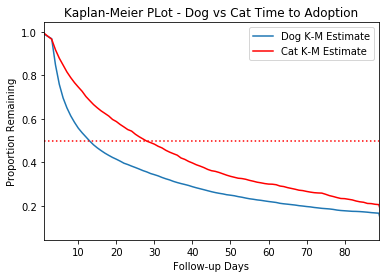

In [256]:



ax = plt.gca()

dog_and_cat_df.plot(kind='line',x='Follow-up Days',y='Dog K-M Estimate',ax=ax)
dog_and_cat_df.plot(kind='line',x='Follow-up Days',y='Cat K-M Estimate', color='red', ax=ax)
plt.ylabel('Proportion Remaining')
plt.title('Kaplan-Meier PLot - Dog vs Cat Time to Adoption')
plt.axhline(y=0.5, color='r', linestyle=":")
plt.xlim(1, 89) 
plt.show()

In [236]:
dog_df_4to7Months =dog_df[dog_df['Age upon Intake'] == 'Months = 4 to 7']
dog_df_8to11Months =dog_df[dog_df['Age upon Intake'] == 'Months = 8 to 11']
dog_df_1Year =dog_df[dog_df['Age upon Intake'] == 'Years = 1']
dog_df_2Year =dog_df[dog_df['Age upon Intake'] == 'Years = 2']

In [237]:
kmf.fit(durations = dog_df_4to7Months.duration, 
        event_observed = dog_df_4to7Months.adopted)
dog_df_4to7Months=kmf.survival_function_
dog_df_4to7Months=dog_df_4to7Months.reset_index()
dog_df_4to7Months=dog_df_4to7Months.rename(index=str, columns={"KM_estimate": "Dog 4 to 7 months K-M Estimate","timeline":"Follow-up Days"})

kmf.fit(durations = dog_df_8to11Months.duration, 
        event_observed = dog_df_8to11Months.adopted)
dog_df_8to11Months=kmf.survival_function_
dog_df_8to11Months=dog_df_8to11Months.reset_index()
dog_df_8to11Months=dog_df_8to11Months.rename(index=str, columns={"KM_estimate": "Dog 8 to 11 months K-M Estimate","timeline":"Follow-up Days"})

kmf.fit(durations = dog_df_1Year.duration, 
        event_observed = dog_df_1Year.adopted)
dog_df_1Year=kmf.survival_function_
dog_df_1Year=dog_df_1Year.reset_index()
dog_df_1Year=dog_df_1Year.rename(index=str, columns={"KM_estimate": "Dog 1 year K-M Estimate","timeline":"Follow-up Days"})

kmf.fit(durations = dog_df_2Year.duration, 
        event_observed = dog_df_2Year.adopted)
dog_df_2Year=kmf.survival_function_
dog_df_2Year=dog_df_2Year.reset_index()
dog_df_2Year=dog_df_2Year.rename(index=str, columns={"KM_estimate": "Dog 2 year K-M Estimate","timeline":"Follow-up Days"})


In [242]:
#trim the length of follow-up for plotting to 28 days - just doing this for the first file because using left merge
dog_df_4to7Months=dog_df_4to7Months[dog_df_4to7Months['Follow-up Days'] < 29]


,Follow-up Days,Dog 4 to 7 months K-M Estimate
0,0.0,0.997477
1,1.0,0.990230
2,2.0,0.973435
3,3.0,0.956979
4,4.0,0.745914
5,5.0,0.586224
6,6.0,0.492353
7,7.0,0.430809
8,8.0,0.379269
9,9.0,0.348171


In [244]:
#merge do files
dog_age_df=dog_df_4to7Months.merge(dog_df_8to11Months, on='Follow-up Days', how='left')
dog_age_df=dog_age_df.merge(dog_df_1Year, on='Follow-up Days', how='left')
dog_age_df=dog_age_df.merge(dog_df_2Year, on='Follow-up Days', how='left')

In [246]:
# now plot multiple ages lines for dogs


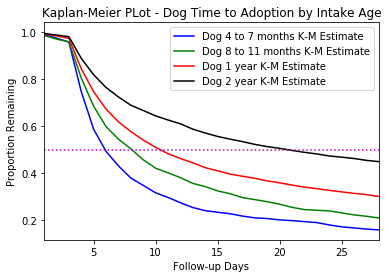

In [254]:
ax = plt.gca()

dog_age_df.plot(kind='line',x='Follow-up Days',y='Dog 4 to 7 months K-M Estimate',color='b',ax=ax)
dog_age_df.plot(kind='line',x='Follow-up Days',y='Dog 8 to 11 months K-M Estimate', color='g', ax=ax)
dog_age_df.plot(kind='line',x='Follow-up Days',y='Dog 1 year K-M Estimate', color='r', ax=ax)
dog_age_df.plot(kind='line',x='Follow-up Days',y='Dog 2 year K-M Estimate', color='k', ax=ax)
plt.ylabel('Proportion Remaining')
plt.title('Kaplan-Meier PLot - Dog Time to Adoption by Intake Age')
import matplotlib.pyplot as plt
plt.axhline(y=0.5, color='m', linestyle=":")
plt.xlim(1, 28) 
plt.show()